***in this code i will just preprocess data set of titanic dataset***

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('train.csv')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
data.shape

(891, 12)

In [8]:
data.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [9]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,7.2500,NaN,S
1,1,1,female,38.0,1,0,71.2833,C85,C
2,1,3,female,26.0,0,0,7.9250,NaN,S
3,1,1,female,35.0,1,0,53.1000,C123,S
4,0,3,male,35.0,0,0,8.0500,NaN,S


In [10]:
unique = data.nunique()
types = data.dtypes
nulls = data.isnull().sum() / data.shape[0]

In [11]:
pd.DataFrame({'unique': unique, 'types': types, 'nulls': nulls})

,unique,types,nulls
Survived,2,int64,0.000000
Pclass,3,int64,0.000000
Sex,2,object,0.000000
Age,88,float64,0.198653
SibSp,7,int64,0.000000
Parch,7,int64,0.000000
Fare,248,float64,0.000000
Cabin,147,object,0.771044
Embarked,3,object,0.002245


In [12]:
data.dropna(subset=['Embarked'], inplace=True)

In [13]:
cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
data[cols] = data[cols].astype('category')

In [14]:
data.drop("Cabin", axis=1, inplace=True)

In [15]:
data.fillna({'Age': data['Age'].median()}, inplace=True)

In [16]:
nulls = data.isnull().sum()
types = data.dtypes

In [17]:
pd.DataFrame({'nulls': nulls, 'types': types})

,nulls,types
Survived,0,category
Pclass,0,category
Sex,0,category
Age,0,float64
SibSp,0,category
Parch,0,category
Fare,0,float64
Embarked,0,category


In [33]:
cols = data.select_dtypes('number').columns

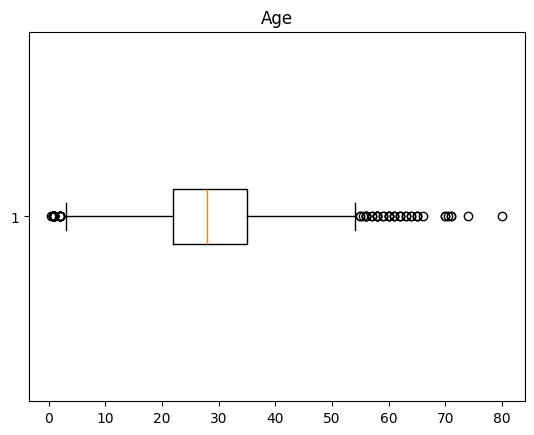

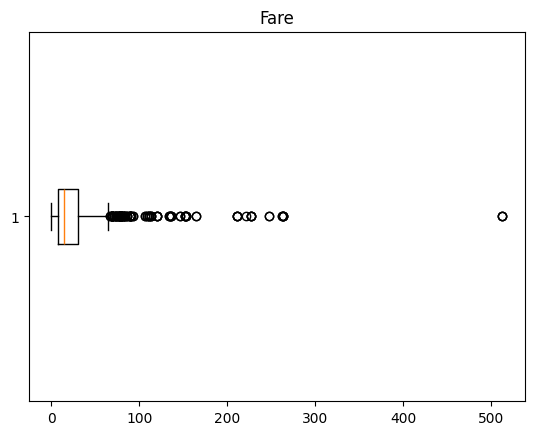

In [34]:
for col in cols:
    plt.boxplot(data[col], orientation='horizontal')
    plt.title(col)
    plt.show()

In [35]:
for col in cols:
    q1 = data[col].quantile(.25)
    q2 = data[col].quantile(.75)
    iqr = q2 - q1
    lower_fence = q1 - 1.5 * iqr
    upper_fence = q2 + 1.5 * iqr
    outliers_1 = data[data[col] < lower_fence][col].values
    outliers_2 = data[data[col] > upper_fence][col].values
    data.replace(outliers_1, lower_fence, inplace=True)
    data.replace(outliers_2, upper_fence, inplace=True)

/tmp/ipykernel_126812/2255614966.py:9: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  data.replace(outliers_1, lower_fence, inplace=True)


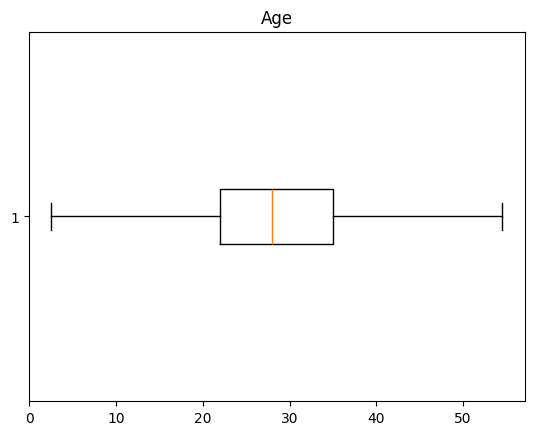

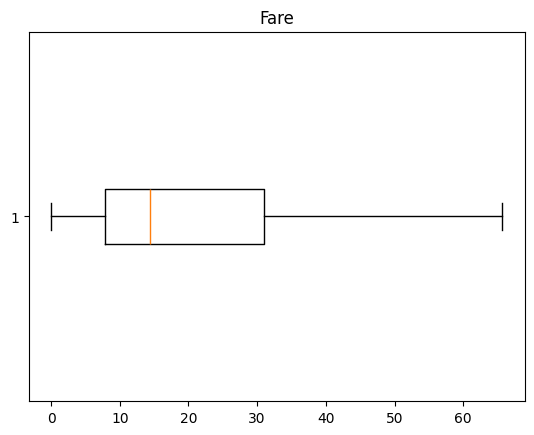

In [36]:
for col in cols:
    plt.boxplot(data[col], orientation='horizontal')
    plt.title(col)
    plt.show()